In [1]:
# Import the necessary components
from epydemix import EpiModel, simulate
from epydemix.visualization import plot_quantiles, plot_trajectories
import matplotlib.pyplot as plt

# Defining a basic SIR model
sir_model = EpiModel(
    name='SIR Model',
    compartments=['S', 'I', 'R'],  # Susceptible, Infected, Recovered
    parameters={
        'beta': 0.3,  # Transmission rate
        'gamma': 0.1  # Recovery rate
    }
)

# Defining the transitions
sir_model.add_transition(source='S', target='I', rate='beta', params={"agent": "I"}, kind='mediated')
sir_model.add_transition(source='I', target='R', rate='gamma', kind='spontaneous')

print(sir_model)

EpiModel(name='SIR Model')
Compartments: 3
  S, I, R
Transitions: 2
  Transitions between compartments:
    S -> I, rate: ['beta'], params: {'agent': 'I'} (kind: mediated)
    I -> R, rate: ['gamma'], params: {} (kind: spontaneous)
Parameters: 2
  Model parameters:
    beta: 0.3
    gamma: 0.1
Population: epydemix_population
  Population size: 100000 individuals
  Demographic groups: 1
    0



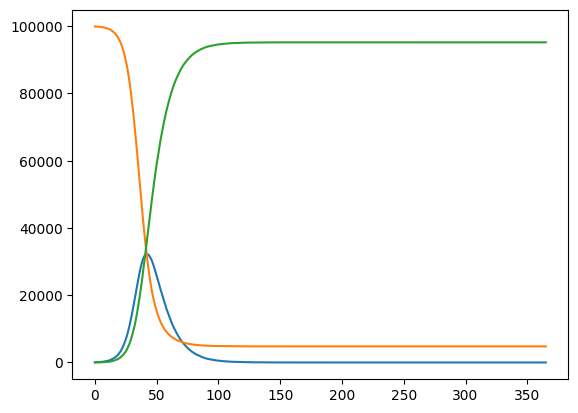

In [2]:
results = simulate(sir_model)
plt.plot(results.compartments["I_total"])
plt.plot(results.compartments["S_total"])
plt.plot(results.compartments["R_total"])


In [3]:
# running the simulations
sir_results = sir_model.run_simulations(
    start_date="2024-01-01",
    end_date="2024-04-10",
)

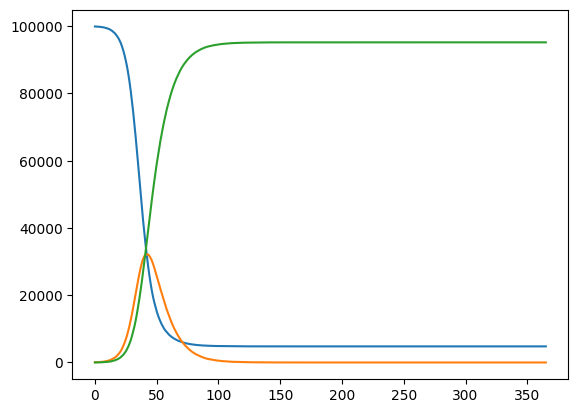

In [4]:
import matplotlib.pyplot as plt
plt.plot(results.compartments["S_total"])
plt.plot(results.compartments["I_total"])
plt.plot(results.compartments["R_total"])

In [5]:
def test_run_simulations(): 
    sir_results = sir_model.run_simulations(
    start_date="2024-01-01",
    end_date="2024-04-10",
)

def test_simulate(): 
    results = simulate(sir_model,    start_date="2024-01-01",
    end_date="2024-04-10",)


In [6]:
%timeit test_run_simulations()

2.67 s ± 900 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit test_simulate()

26.2 ms ± 8.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# 2.72 s ± 410 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# 23.2 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [17]:
import numpy as np
from numba import jit

@jit(nopython=True)
def _compute_multinomial_transitions(current_pop: np.ndarray, 
                                   prob_matrix: np.ndarray,
                                   n_compartments: int) -> np.ndarray:
    """
    Compute multinomial transitions using Numba for better performance.
    """
    n_populations = len(current_pop)
    result = np.zeros((n_populations, n_compartments))
    
    for i in range(n_populations):
        if current_pop[i] > 0:
            # Cast to int since multinomial requires integer population
            n = int(current_pop[i])
            result[i] = np.random.multinomial(n, prob_matrix[i])
            
    return result

In [24]:
current_pop = np.array([100])
prob_matrix = np.array([[0.3, 0.5, 0.2]])
n_compartments = len(prob_matrix[0])
np.random.seed(42)

def test_compute_multinomial_transitions():
    for i in range(100):
        result = _compute_multinomial_transitions(current_pop, prob_matrix, 3)


def test_normal_multinomial():
    for i in range(100):
        n_populations = len(current_pop)
        result = np.zeros((n_populations, n_compartments))
        for i in range(n_populations):
            if current_pop[i] > 0:
                # Cast to int since multinomial requires integer population
                n = int(current_pop[i])
                result[i] = np.random.multinomial(n, prob_matrix[i])
            


In [ ]:
%timeit test_compute_multinomial_transitions()

In [ ]:
%timeit test_normal_multinomial()

In [ ]:
100 * 3